In [1]:
import pandas as pd #import pandas package and pd use for short from of pandas you can any name 
import matplotlib.pyplot as plt 
import warnings as wr # warnings use for don't show unnecessary warning  
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Height-Weight Data.csv") # read_csv use to read csv type(comma seprate) data

In [3]:
df.head()  # use for show first n (5) number of row  from dataset,
           # but you can change number of row you want to see like df.head(10)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.head(10)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676


In [5]:
df.tail(5) # tail return last n number of row  

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [6]:
df.shape #show how many row and columns in data set

(3501, 2)

In [7]:
df.isnull().sum() #check is there any null value in dataframe 

Height    0
Weight    0
dtype: int64

In [8]:
df.info() # show summary of a DataFrame and print information of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


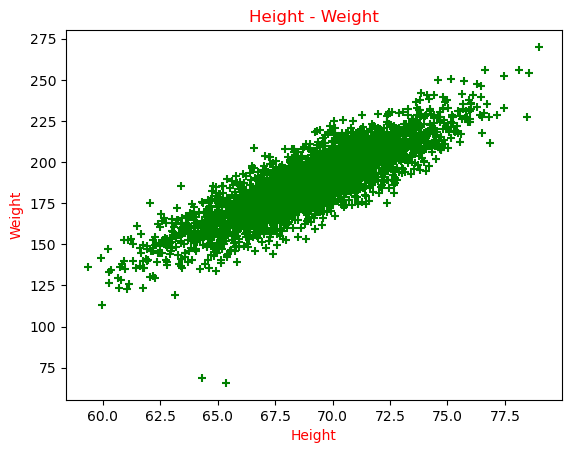

In [9]:
plt.scatter(df.Height, df.Weight,color='green',marker = "+") # plot a scatter plot , take height in x axis and weight in y axis
plt.xlabel('Height',color='red') #x axis title
plt.ylabel('Weight',color='red') # y axis title
plt.title('Height - Weight',color='red') #graph title  
plt.savefig("img01.png") # save graph as png file 


In [10]:
df.Height.mean() #calculate mean value (average) of height

69.02441087268797

In [11]:
df.Weight.mean() #calculate mean value (average) of weight

186.89125797946284

In [12]:
x = df[['Height']] # assign  height in x veriable  or drop this one using x = df.drop('rent', axis=1)

In [13]:
y = df[['Weight']] # assign  weight in y veriable 

In [14]:
y.head() #show the y first five row data 

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [15]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
reg = LinearRegression() # creat a  object for linear regression 

In [18]:
reg.fit(x,y) # train the maodel

LinearRegression()

In [19]:
reg.coef_ # find co-efficient 

array([[5.95843786]])

In [20]:
reg.intercept_ #find intercept of dataset

array([-224.38640537])

In [21]:
reg.predict(x) # predict all weight value 

array([[215.62645706],
       [185.44629614],
       [217.19405276],
       ...,
       [216.01692618],
       [177.18859679],
       [209.02422774]])

In [22]:
df['predicted_weight'] = reg.predict(x) # create new column for predict variable 

In [23]:
df.head()

,Height,Weight,predicted_weight
0,73.847017,241.893563,215.626457
1,68.781904,162.310473,185.446296
2,74.110105,212.740856,217.194053
3,71.730978,220.042470,203.018172
4,69.881796,206.349801,191.999933


In [24]:
reg.predict([[73.847017]])

array([[215.62645694]])

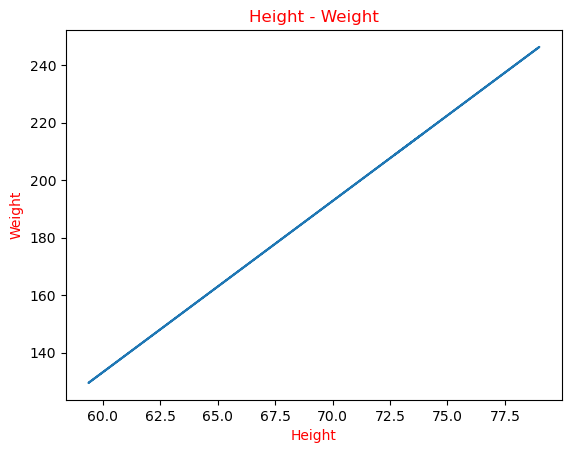

In [25]:
plt.plot(x, reg.predict(df[['Height']]))
# x axis = Height
# y axis = predicted weight
plt.xlabel('Height',color='red') #x axis title
plt.ylabel('Weight',color='red') # y axis title
plt.title('Height - Weight',color='red') #graph title
plt.savefig('bestfit.png') #save graph in local drive

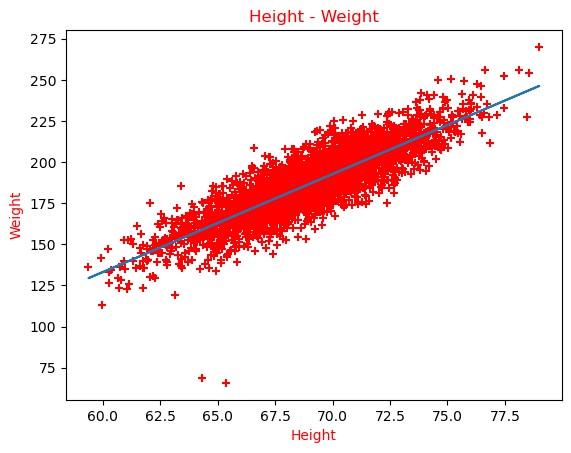

In [26]:
plt.plot(x, reg.predict(x)) #best fit line
# x axis = Height
# y axis = predicted weight
plt.scatter(x,df.Weight,color = "red",marker="+") # Height & Weight scatter graph
plt.xlabel('Height',color='red') #x axis title
plt.ylabel('Weight',color='red') # y axis title
plt.title('Height - Weight',color='red') #graph title
plt.savefig('scatter.png') #save graph in local drive

In [27]:
reg.score(x,y) # training accuracy

0.7323584758139253

In [28]:
from sklearn.metrics import mean_squared_error 

In [29]:
mean_squared_error(df[["Height"]],reg.predict(df[['Height']])) # Residuals(Error) (actual y - predicted y)

14093.441594098931

In [30]:
mean_squared_error(x,reg.predict(x)) # Residuals(Error) (actual y - predicted y)

14093.441594098931

In [31]:
import handcalcs.render

In [32]:
print('Actual value for Height 73.847017 Weight ',df.Weight[0])

Actual value for Height 73.847017 Weight  241.8935632


In [33]:
%%render
# i find this handcalcs in youtube for this reason i try this
#using this easily calculate math calculation
c = reg.coef_ + reg.intercept_
x = 73.847017
y = reg.coef_ * x  + reg.intercept_ 

<IPython.core.display.Latex object>